In [1]:
import pandas as pd
import requests
from urllib.parse import urlencode
import json, datetime

api_key = "94bd224fdd23e740f91f7fc88375518f"

city = "Warsaw"

In [2]:
params = dict(
    q=city,
    appid=api_key
)

url = 'http://api.openweathermap.org/data/2.5/forecast?q={}&units=metric&APPID={}'.format(city, api_key)
r = requests.get(url)
weather = json.loads(r.text)
df = pd.DataFrame.from_dict(weather['list'])

In [3]:
from datetime import datetime

def _dict_to_val(_dict):
    try:
        return list(_dict.values())[0]
    except:
        return 0

df["clouds"] = df.apply(lambda x: x.clouds["all"], axis=1)
df["rain"] = df.apply(lambda x: _dict_to_val(x.rain), axis=1)
df["snow"] = df.apply(lambda x: _dict_to_val(x.snow), axis=1)
df["sys"] = df.apply(lambda x: list(x.sys["pod"]), axis=1)
df["dt_txt1"] = df.apply(lambda x: datetime.strptime(x.dt_txt, '%Y-%m-%d %H:%M:%S'), axis=1)
df["date"] = df.apply(lambda x: x.dt_txt1.date(), axis=1)
df["time"] = df.apply(lambda x: x.dt_txt1.time(), axis=1)

# datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')

df  = df.merge(df.wind.apply(lambda s: pd.Series({'wind_speed':s["speed"], 'wind_deg':s["deg"]})), 
    left_index=True, right_index=True)
df = df.merge(df.main.apply(lambda s: pd.Series({'temp':s["temp"], 'temp_min':s["temp_min"], 'temp_max':s["temp_max"], 'pressure': s['pressure'], "sea_level": s["sea_level"], "grnd_level": s["grnd_level"], "humidity": s["humidity"], "temp_kf": s["temp_kf"]})), 
    left_index=True, right_index=True)

df = df.drop(columns=["main", "wind", "weather", "dt_txt"])

In [4]:
df

,clouds,dt,rain,snow,sys,dt_txt1,date,time,wind_speed,wind_deg,temp,temp_min,temp_max,pressure,sea_level,grnd_level,humidity,temp_kf
0,64,1546700400,0,0.00200,[n],2019-01-05 15:00:00,2019-01-05,15:00:00,5.96,348.50500,-0.69,-1.50,-0.69,1012.17,1025.00,1012.17,95.0,0.81
1,80,1546711200,0,0.09350,[n],2019-01-05 18:00:00,2019-01-05,18:00:00,6.36,354.00000,-1.46,-2.07,-1.46,1014.56,1027.28,1014.56,90.0,0.61
2,64,1546722000,0,0.07300,[n],2019-01-05 21:00:00,2019-01-05,21:00:00,6.02,4.50116,-3.39,-3.80,-3.39,1016.13,1028.98,1016.13,92.0,0.41
3,76,1546732800,0,0.03400,[n],2019-01-06 00:00:00,2019-01-06,00:00:00,5.41,3.50128,-5.63,-5.84,-5.63,1017.76,1030.75,1017.76,87.0,0.20
4,68,1546743600,0,0.03600,[n],2019-01-06 03:00:00,2019-01-06,03:00:00,5.41,2.00000,-7.35,-7.35,-7.35,1019.40,1032.47,1019.40,88.0,0.00
5,56,1546754400,0,0.03275,[n],2019-01-06 06:00:00,2019-01-06,06:00:00,5.40,1.00085,-7.84,-7.84,-7.84,1020.87,1033.95,1020.87,87.0,0.00
6,76,1546765200,0,0.02875,[d],2019-01-06 09:00:00,2019-01-06,09:00:00,5.61,359.50200,-6.77,-6.77,-6.77,1022.44,1035.49,1022.44,89.0,0.00
7,76,1546776000,0,0.02875,[d],2019-01-06 12:00:00,2019-01-06,12:00:00,5.46,7.50800,-5.33,-5.33,-5.33,1023.40,1036.47,1023.40,92.0,0.00
8,76,1546786800,0,0.02875,[n],2019-01-06 15:00:00,2019-01-06,15:00:00,4.57,14.50360,-5.57,-5.57,-5.57,1025.35,1038.53,1025.35,85.0,0.00
9,76,1546797600,0,0.06500,[n],2019-01-06 18:00:00,2019-01-06,18:00:00,3.86,20.00110,-6.02,-6.02,-6.02,1027.61,1040.77,1027.61,89.0,0.00


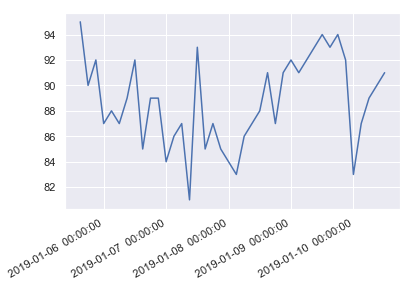

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
sns.set()
%matplotlib inline

fig, ax = plt.subplots()
plt.plot(df["dt_txt1"], df["humidity"])

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d  %H:%M:%S'))
fig.autofmt_xdate()
plt.show()

In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib.dates as mdates
# sns.set()
# %matplotlib inline

# def plot_humidity_by_date(date):
#     fig, ax = plt.subplots()
#     df2 = df.loc[df["date"] == datetime.strptime(date, "%Y-%m-%d").date()]
#     plt.plot(df2["time"], df2["humidity"])
# #     plt.bar(df2["time"], df[""])
#     fig.autofmt_xdate()
#     plt.show()

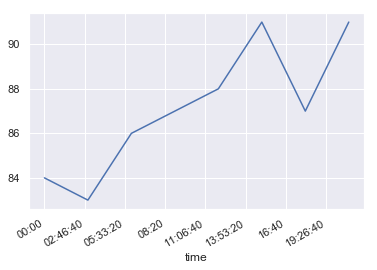

In [7]:
# plot_humidity_by_date("2019-01-08")

In [61]:
import time
from datetime import datetime
import numpy as np
from matplotlib.ticker import FuncFormatter, MaxNLocator

def format_fn(tick_val, tick_pos):
    if int(tick_val) in list(t_dict.keys()):
        print(t_dict[int(tick_val)])
        return t_dict[int(tick_val)]
    else:
        return ''
    
def plot_humidity_by_date(date):
    width = 0.5
    t_dict = {}
    tList = []
    fig, ax = plt.subplots()
    t = 0
    df2 = df.loc[df["date"] == datetime.strptime(date, "%Y-%m-%d").date()]
    date_time_list = df2["dt_txt1"].tolist()
    while t < len(date_time_list):
        ti = int(time.mktime(date_time_list[t].timetuple()))
        t_dict[ti] = date_time_list[t]
        tList.append(ti)
        t = t + 1

    plt.plot(tList, df2["humidity"],'ro')

    z = np.polyfit(tList, df2["humidity"], 25)
    f = np.poly1d(z)
    x_new = np.linspace(tList[0], tList[-1], 50)
    y_new = f(x_new)
    plt.plot(x_new, y_new, color="blue")

    plt.ylabel('Humidity')
    plt.xlabel('Date/Time')

    ax.xaxis.set_major_formatter(FuncFormatter(format_fn))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.autoscale(tight=True)

    plt.show()

/home/rozanovk/PycharmProjects/weather_forecast/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: RankWarning: Polyfit may be poorly conditioned


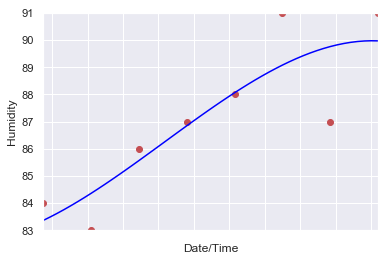

In [62]:
plot_humidity_by_date("2019-01-08")

**Plot pressure**

In [ ]:
df2 = df.loc[df["date"] == datetime.strptime("2019-01-08", "%Y-%m-%d").date()]
df2["pressure_mmHg"] = df2.apply(lambda x: x.pressure*1,293)